<a href="https://colab.research.google.com/github/icarob-eng/data-science-airlines/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise no ano


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os


# Caminho para a pasta onde estão os arquivos
data_dir = 'archive'

# Lista de anos que queremos carregar
anos = [2018, 2019, 2020, 2021, 2022]

# Dicionário para armazenar os DataFrames
dados_voos = {}

for ano in anos:
    csv_path = os.path.join(data_dir, f'Combined_Flights_{ano}.csv')
    parquet_path = os.path.join(data_dir, f'Combined_Flights_{ano}.parquet')

    if os.path.exists(csv_path):
        print(f"Lendo CSV para o ano {ano}")
        dados_voos[ano] = pd.read_csv(csv_path)
    elif os.path.exists(parquet_path):
        print(f"Lendo Parquet para o ano {ano}")
        dados_voos[ano] = pd.read_parquet(parquet_path)
    else:
        print(f"Dados para o ano {ano} não encontrados.")

# Carregando também o arquivo de companhias aéreas
airlines_path = os.path.join(data_dir, 'Airlines.csv')
if os.path.exists(airlines_path):
    airlines_df = pd.read_csv(airlines_path)
    print("Arquivo Airlines.csv carregado com sucesso.")
else:
    airlines_df = None
    print("Arquivo Airlines.csv não encontrado.")

# Exemplo de visualização
dados_voos[2020].head()
# print(airlines_df.head())


Dados para o ano 2018 não encontrados.
Dados para o ano 2019 não encontrados.
Lendo CSV para o ano 2020
Dados para o ano 2021 não encontrados.
Dados para o ano 2022 não encontrados.
Arquivo Airlines.csv não encontrado.


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2030.0,4.0,2056,-22.0,0.0,-2.0,2000-2059,2,0.0
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2022.0,5.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,0.0,-10.0,...,2000.0,2117.0,5.0,2056,26.0,1.0,1.0,2000-2059,2,0.0
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,0.0,-8.0,...,1910.0,2023.0,4.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,0.0,-9.0,...,1910.0,2022.0,4.0,2056,-30.0,0.0,-2.0,2000-2059,2,0.0


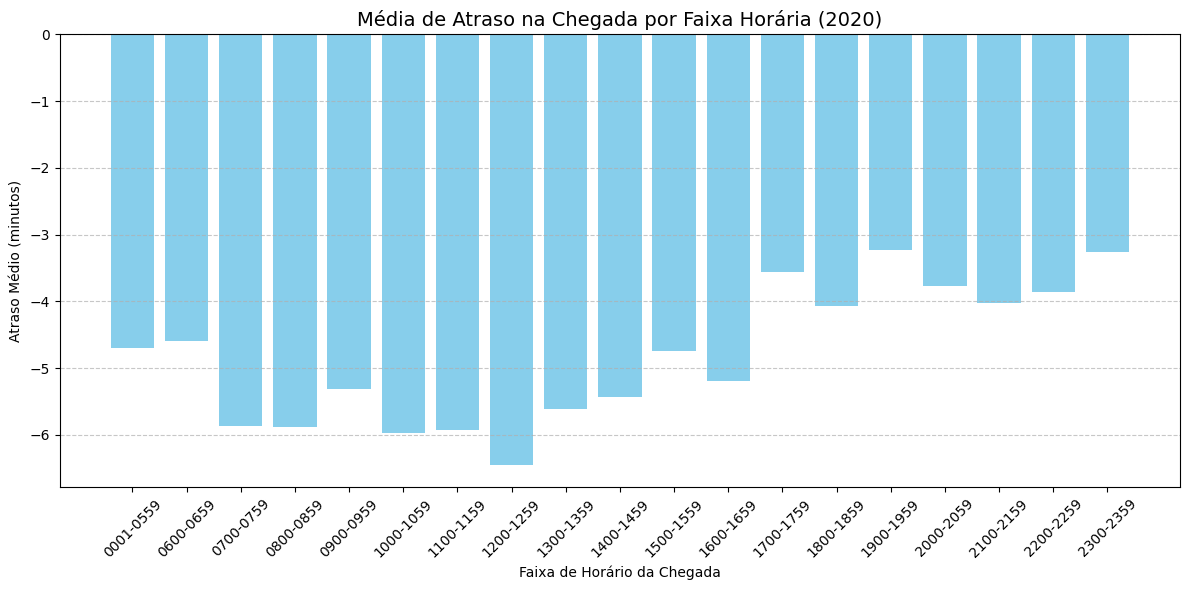

In [5]:
### Relação entre os atrasos médios e o horário do atraso de voos no ano de 2019 ###

# Filtra o dataframe de 2019
df_ano = dados_voos[2020]

# Agrupa os dados e calcula a média de atraso na chegada por faixa horária
media_atraso_por_hora = (
    df_ano.groupby('ArrTimeBlk')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrTimeBlk')
)

x = media_atraso_por_hora['ArrTimeBlk']
y = media_atraso_por_hora['ArrDelay']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

plt.title('Média de Atraso na Chegada por Faixa Horária (2020)', fontsize=14)
plt.xlabel('Faixa de Horário da Chegada')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gcf().savefig('media_atraso_horario_2020.png', dpi=300, bbox_inches='tight')
plt.show()


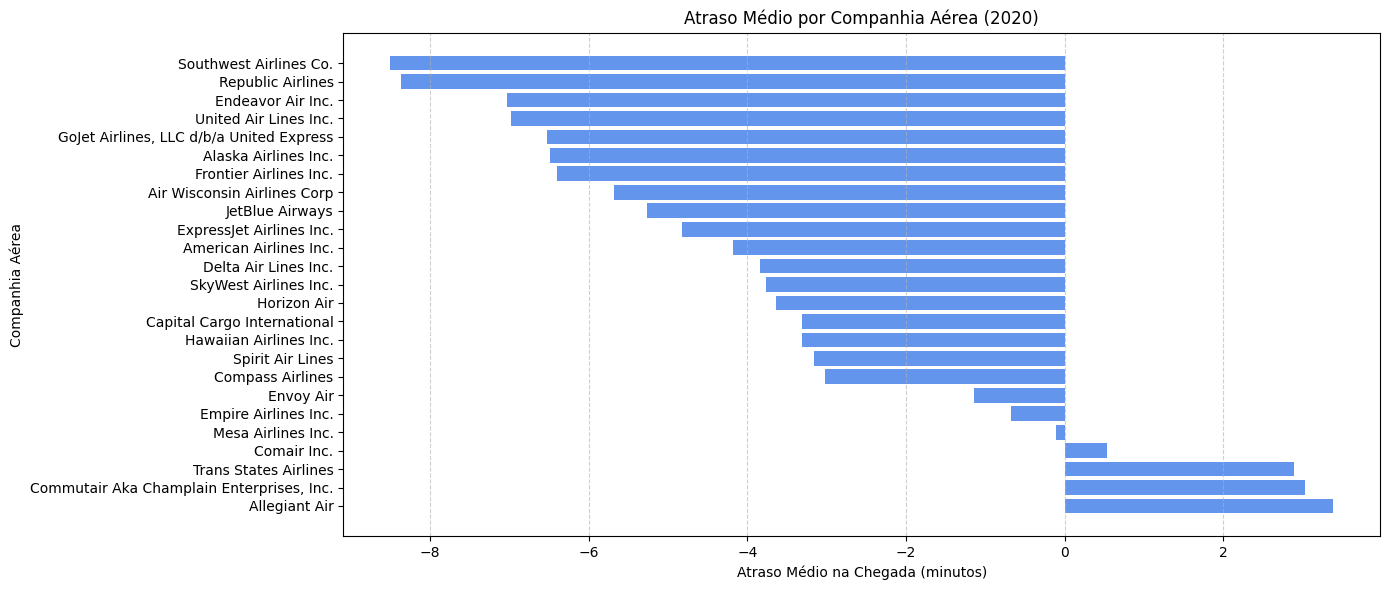

In [8]:
# Atraso por companhia aérea

# Agrupa por companhia aérea e calcula a média de atraso na chegada
media_atraso_por_companhia = (
    df_ano.groupby('Airline')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrDelay', ascending=False)
)

x = media_atraso_por_companhia['Airline']
y = media_atraso_por_companhia['ArrDelay']

plt.figure(figsize=(14, 6))
plt.barh(x, y, color='cornflowerblue')
plt.xlabel('Atraso Médio na Chegada (minutos)')
plt.ylabel('Companhia Aérea')
plt.title('Atraso Médio por Companhia Aérea (2020)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('atraso_por_companhia_2020.png', dpi=300, bbox_inches='tight')
plt.show()


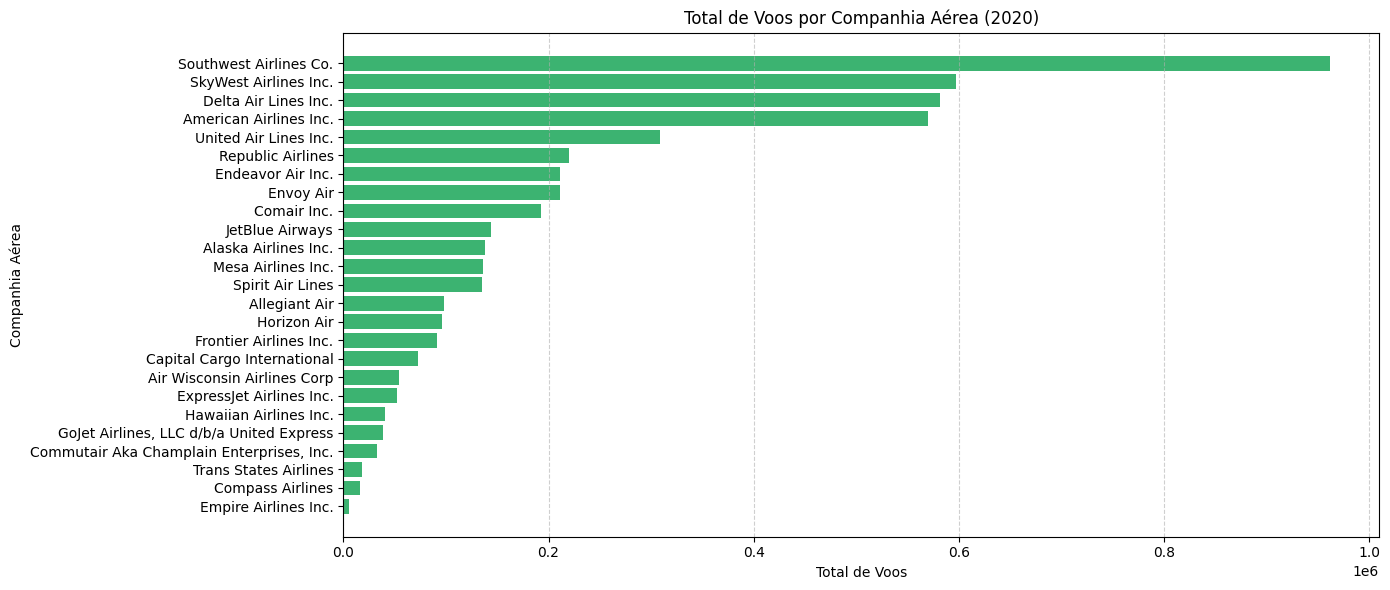

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que os nomes das colunas estejam limpos
df_ano.columns = df_ano.columns.str.strip()

voos_por_companhia_series = df_ano['Airline'].value_counts()
voos_por_companhia = voos_por_companhia_series.reset_index()

voos_por_companhia = voos_por_companhia.rename(columns={'count': 'TotalVoos'})


x = voos_por_companhia['Airline']
y = voos_por_companhia['TotalVoos']

plt.figure(figsize=(14, 6))
plt.barh(x, y, color='mediumseagreen')
plt.xlabel('Total de Voos')
plt.ylabel('Companhia Aérea')
plt.title('Total de Voos por Companhia Aérea (2020)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('total_voo_companhia_2020.png', dpi=300, bbox_inches='tight')
plt.show()


Total de companhias aéreas únicas: 25


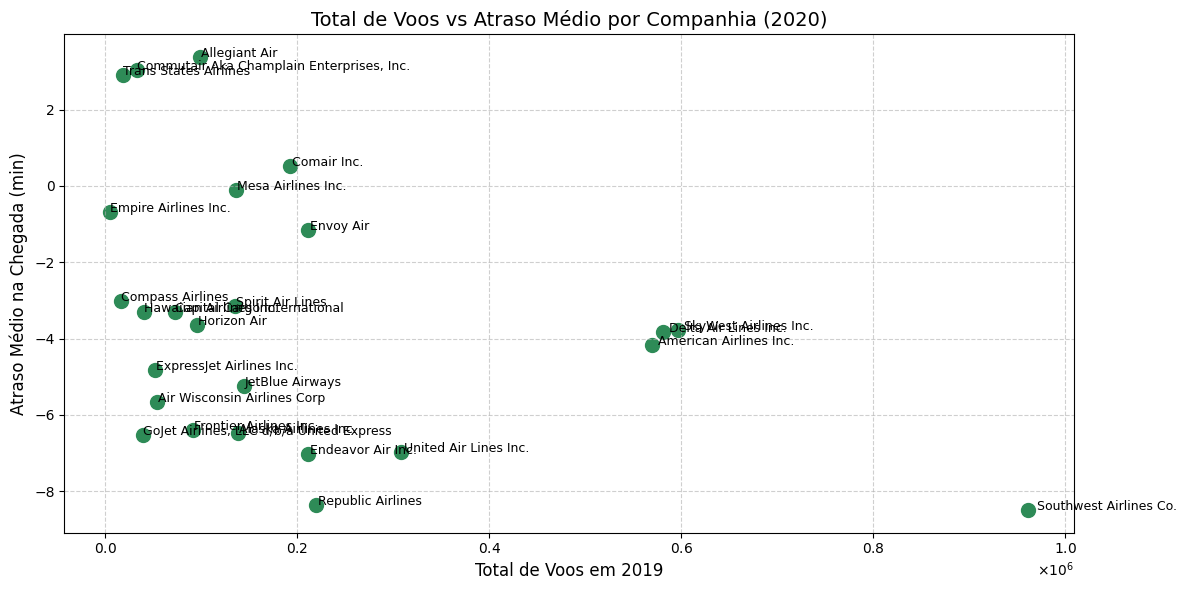

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

# Agrupar por companhia aérea
agrupado = df_ano.groupby('Airline').agg({
    'ArrDelay': 'mean',
    'FlightDate': 'count'  # número de voos (poderia usar qualquer coluna não nula)
}).reset_index()

num_companhias = df_ano['Airline'].nunique()
print(f"Total de companhias aéreas únicas: {num_companhias}")

agrupado = agrupado.rename(columns={
    'ArrDelay': 'AtrasoMedio',
    'FlightDate': 'TotalVoos'
})

plt.figure(figsize=(12, 6))
plt.scatter(agrupado['TotalVoos'], agrupado['AtrasoMedio'], color='seagreen', s=100)

for i in range(len(agrupado)):
    plt.text(agrupado['TotalVoos'][i]*1.01, agrupado['AtrasoMedio'][i],
             agrupado['Airline'][i], fontsize=9)

# Aplicar notação científica no eixo x
plt.gca().xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel('Total de Voos em 2019', fontsize=12)
plt.ylabel('Atraso Médio na Chegada (min)', fontsize=12)
plt.title('Total de Voos vs Atraso Médio por Companhia (2020)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Voos_Atraso_medio_Companhias_2020.png', dpi=300, bbox_inches='tight')
plt.show()



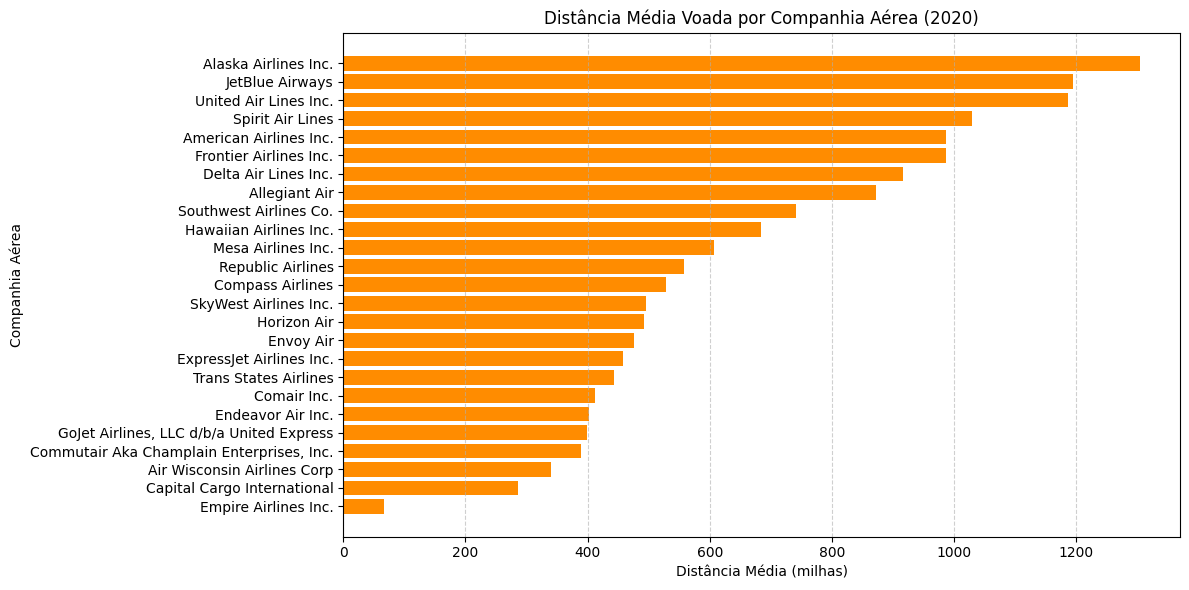

In [12]:
# Relação entre distâncias média percorridas por companhias aéreas

# Agrupar por companhia e calcular distância média
distancia_media = df_ano.groupby('Airline')['Distance'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
plt.barh(distancia_media.index, distancia_media.values, color='darkorange')
plt.xlabel('Distância Média (milhas)')
plt.ylabel('Companhia Aérea')
plt.title('Distância Média Voada por Companhia Aérea (2020)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Distancia_Companhias_2020.png', dpi=300, bbox_inches='tight')
plt.show()


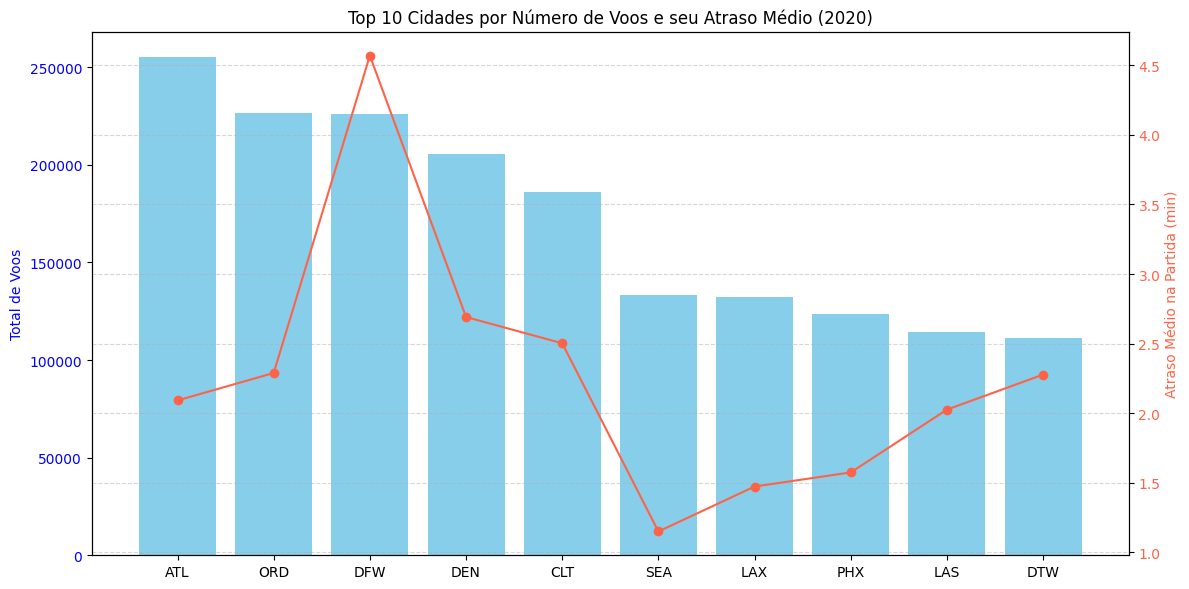

In [17]:
# Comparação das cidades com maior número de voos e com o atraso médio (saída) dessa cidade

# Agrupar por cidade de origem
agrupado_origem = df_ano.groupby('Origin').agg({
    'DepDelay': 'mean',
    'FlightDate': 'count'
}).rename(columns={
    'DepDelay': 'AtrasoMedio',
    'FlightDate': 'TotalVoos'
}).reset_index()

# Selecionar top 10 cidades com mais voos
top_cidades = agrupado_origem.sort_values(by='TotalVoos', ascending=False).head(10)

# Gráfico com duas barras (lado a lado)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra 1: total de voos
ax1.bar(top_cidades['Origin'], top_cidades['TotalVoos'], color='skyblue', label='Total de Voos')
ax1.set_ylabel('Total de Voos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo secundário: atraso médio
ax2 = ax1.twinx()
ax2.plot(top_cidades['Origin'], top_cidades['AtrasoMedio'], color='tomato', marker='o', label='Atraso Médio')
ax2.set_ylabel('Atraso Médio na Partida (min)', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

# Título e ajustes
plt.title('Top 10 Cidades por Número de Voos e seu Atraso Médio (2020)')
fig.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.gcf().savefig('Top10_cidades_atraso_medio_2020.png', dpi=300, bbox_inches='tight')
plt.show()


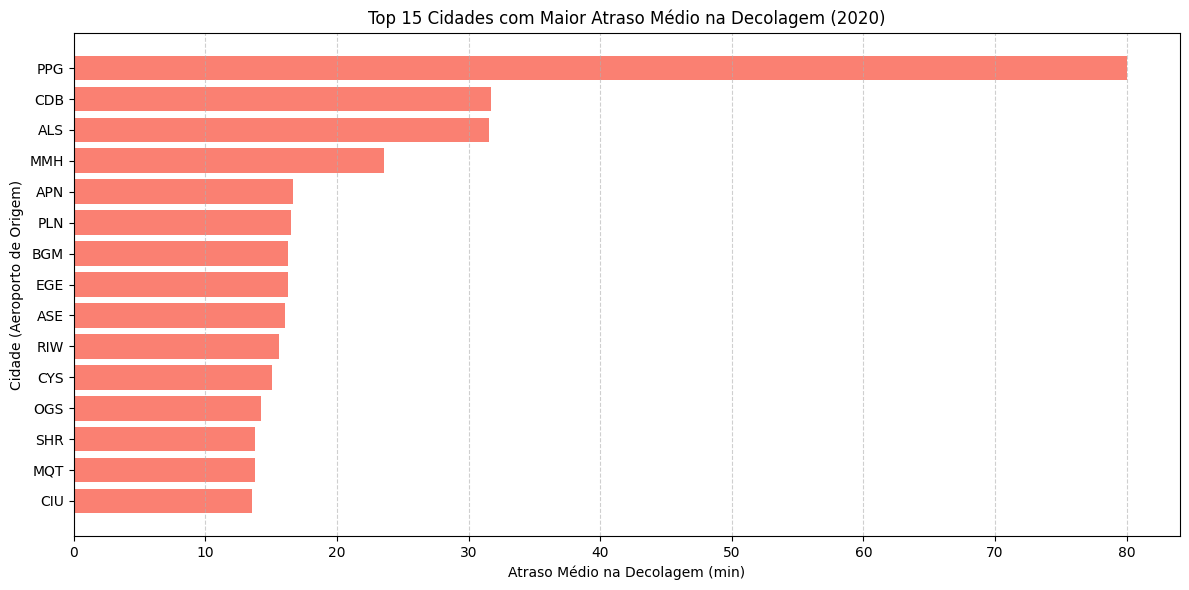

In [19]:
# Análise dos atrasos médios (saída) de acordo com as cidades

# Agrupar por cidade (aeroporto de origem) e calcular o atraso médio
atraso_por_cidade = df_ano.groupby('Origin')['DepDelay'].mean().sort_values(ascending=False).head(15)

# Gráfico de barras horizontais
plt.figure(figsize=(12, 6))
plt.barh(atraso_por_cidade.index, atraso_por_cidade.values, color='salmon')
plt.xlabel('Atraso Médio na Decolagem (min)')
plt.ylabel('Cidade (Aeroporto de Origem)')
plt.title('Top 15 Cidades com Maior Atraso Médio na Decolagem (2020)')
plt.gca().invert_yaxis()  # Coloca a maior barra no topo
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Atraso_decolagem_2020.png', dpi=300, bbox_inches='tight')
plt.show()


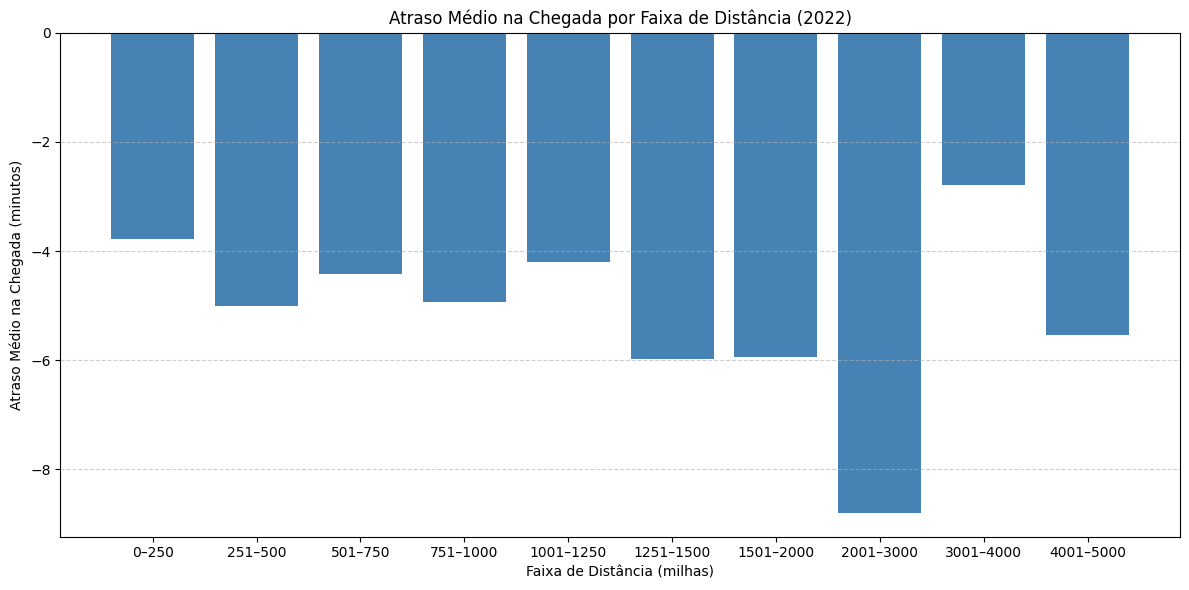

In [22]:
# Análise da relação entre o atraso na chegada (ArrDelay) e intervalos de distância do voo (Distance).

# Filtrar voos válidos
df_filtrado = df_ano[
    (df_ano['Cancelled'] == False) &
    df_ano['ArrDelay'].notna() &
    df_ano['Distance'].notna()
]

# Criar faixas de distância
bins = [0, 250, 500, 750, 1000, 1250, 1500, 2000, 3000, 4000, 5000]
labels = ['0–250', '251–500', '501–750', '751–1000', '1001–1250', '1251–1500',
          '1501–2000', '2001–3000', '3001–4000', '4001–5000']

df_filtrado = df_filtrado.copy()
df_filtrado['FaixaDistancia'] = pd.cut(df_filtrado['Distance'], bins=bins, labels=labels)

atraso_por_faixa = df_filtrado.groupby('FaixaDistancia', observed=False)['ArrDelay'].mean().reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(atraso_por_faixa['FaixaDistancia'], atraso_por_faixa['ArrDelay'], color='steelblue')

plt.xlabel('Faixa de Distância (milhas)')
plt.ylabel('Atraso Médio na Chegada (minutos)')
plt.title('Atraso Médio na Chegada por Faixa de Distância (2022)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Atraso_medio_chegada_distancia_2020.png', dpi=300, bbox_inches='tight')
plt.show()
